# Understanding and Predciting Employee Attrition HR Analytics

## Introduction
   This project is about to predict employee attrition, based on historical data. Also, to analyze feature importances to see which feature is highly effecting employee attrition. Our Data is from IBM.
## Table of Contents
### 1. The Problem: What reasons cause employee attrition problems
### 2. Data Quality Check
### 3. Descriptive Statistics
### 4. Exploratory Data Analysis
### 5. Pre-Processing
### 6. Class Imbalance
### 7. Split Train and Test Data Set
### 8. Treat Imbalance Data
### 9. Train and Test Model Performance with 10-Fold CV
### 10. Evaluation Metic wiht F1, ROC/AUC



# Import Packages

In [1]:
#import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

%matplotlib inline

# Read Data

In [2]:
df = pd.read_excel('HR-Employee-Attrition.xlsx')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Quality Check

In [4]:
# To see if there is any missing data
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Exploratory Data Analysis

In [7]:
# To see how large the data set is (how many employees are in the data set)
df.shape

(1470, 35)

In [8]:
# Convert attrition from "yes or no" to '1 or 0' category type
df.Attrition.replace(['Yes', 'No'], [1, 0], inplace = True )
df.Attrition.astype('category')

0       1
1       0
2       1
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      1
15      0
16      0
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      1
25      0
26      1
27      0
28      0
29      0
       ..
1440    0
1441    0
1442    1
1443    0
1444    1
1445    0
1446    0
1447    0
1448    0
1449    0
1450    0
1451    0
1452    1
1453    0
1454    0
1455    0
1456    0
1457    0
1458    0
1459    0
1460    0
1461    1
1462    0
1463    0
1464    0
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: category
Categories (2, int64): [0, 1]

In [9]:
# Calculate the attrition rate of this company's dataset
attrition_rate = df.Attrition.value_counts()/1470
attrition_rate

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [10]:
# Display the statistical overview of the employees
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
# Display the mean summary of Employees
attrition_summary = df.groupby('Attrition')
attrition_summary.mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [12]:
attrition_summary.std()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,8.88836,403.208379,8.012633,1.027002,0.0,606.217074,1.071132,20.380754,0.692050,1.117933,...,1.071603,0.0,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
1,9.68935,401.899519,8.452525,1.008244,0.0,580.750572,1.169791,20.099958,0.773405,0.940594,...,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349


## Correlation Matrix

In [13]:
# Create a correlation matrix
corr = df.corr()
corr

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


Text(0.5,1,'Heatmap of Correlation Matrix')

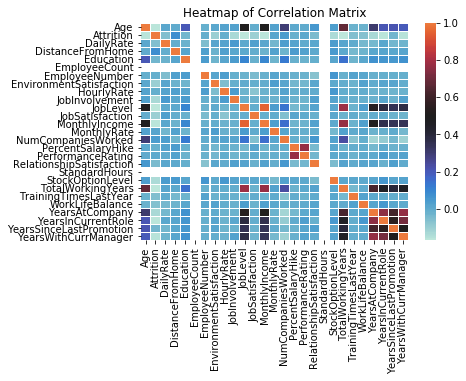

In [14]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths = 0.05, center = 0.5)
plt.title('Heatmap of Correlation Matrix')

Based on our correlation analysis, we can see several variables are strong correlatted, such as Job level, Monthly income, Total working years. Some are somehow correlated with others, such as Age, Years at company, Years in current role, years since last promotion, years with current manager. 

# EDA 1.
## Distribution of Age, Job satisfaction, Monthly income, Years at company, relationship satisfaction, Porformance rateing, stock option level,  total working years, Education

C:\Users\hugep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Employee Education Distribution')

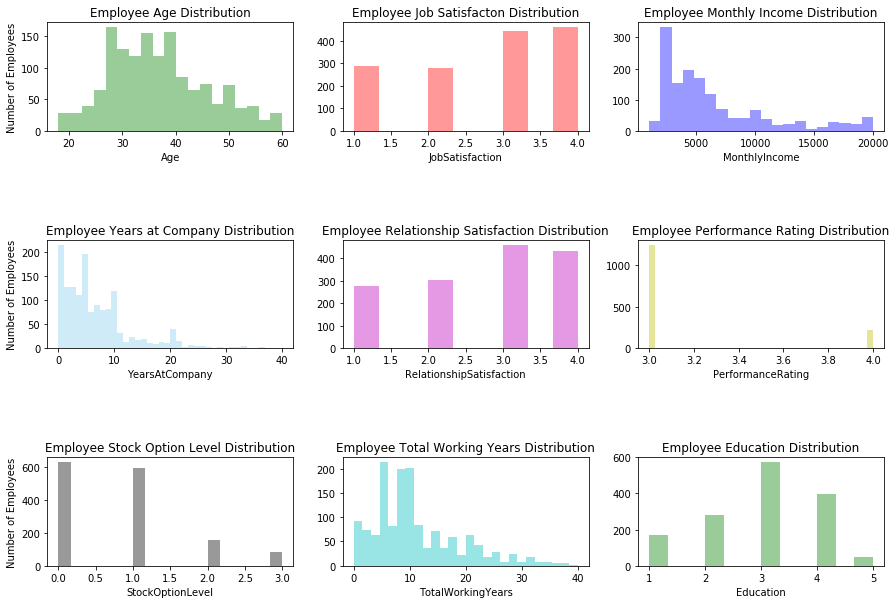

In [15]:
# plot the distribution of all selected variables

#set up matplotlib figure
f, axes = plt.subplots(3, 3, figsize = (15,10))
f.subplots_adjust(hspace=1)

# Graph nine distributions
sns.distplot(df.Age, kde = False, color = "g", ax = axes[0,0]).set_title('Employee Age Distribution')
axes[0,0].set_ylabel('Number of Employees')
sns.distplot(df.JobSatisfaction, kde = False, color = "r", ax = axes[0,1]).set_title('Employee Job Satisfacton Distribution')
# axes[0,1].set_ylabel('Number of Employees')
sns.distplot(df.MonthlyIncome, kde = False, color = "b", ax = axes[0,2]).set_title('Employee Monthly Income Distribution')
# axes[0,2].set_ylabel('Number of Employees')
sns.distplot(df.YearsAtCompany, kde = False, color = "skyblue", ax = axes[1,0]).set_title('Employee Years at Company Distribution')
axes[1,0].set_ylabel('Number of Employees')
sns.distplot(df.RelationshipSatisfaction, kde = False, color = "m", ax = axes[1,1]).set_title('Employee Relationship Satisfaction Distribution')
# axes[1,1].set_ylabel('Number of Employees')
sns.distplot(df.PerformanceRating, kde = False, color = "y", ax = axes[1,2]).set_title('Employee Performance Rating Distribution')
# axes[1,2].set_ylabel('Number of Employees')
sns.distplot(df.StockOptionLevel, kde = False, color = "k", ax = axes[2,0]).set_title('Employee Stock Option Level Distribution')
axes[2,0].set_ylabel('Number of Employees')
sns.distplot(df.TotalWorkingYears, kde = False, color = "c", ax = axes[2,1]).set_title('Employee Total Working Years Distribution')
# axes[2,1].set_ylabel('Number of Employees')
sns.distplot(df.Education, kde = False, color = "g", ax = axes[2,2]).set_title('Employee Education Distribution')
# axes[2,2].set_ylabel('Number of Employees')


# EDA 2. Correlations of Variables
## Age VS Daily Rate, Monthly Income VS Years with Current Manager, Hourly Rate VS Percent Salary Hike

Text(0.5,1,'Attrition distribution among Hourly Rate and Percent Salary Hike')

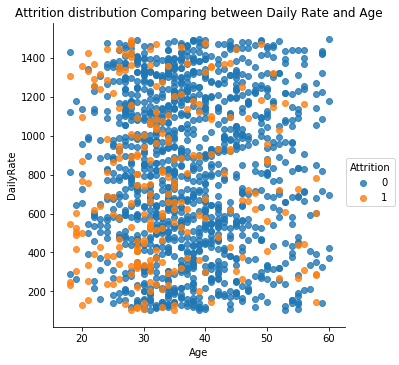

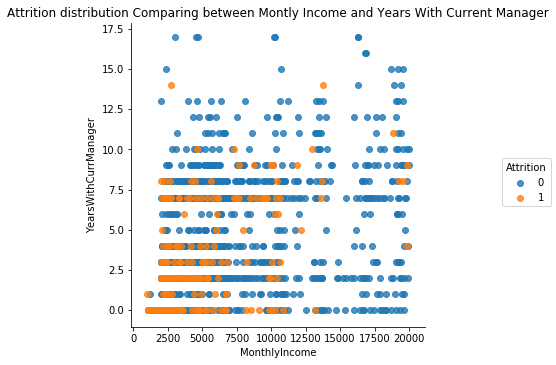

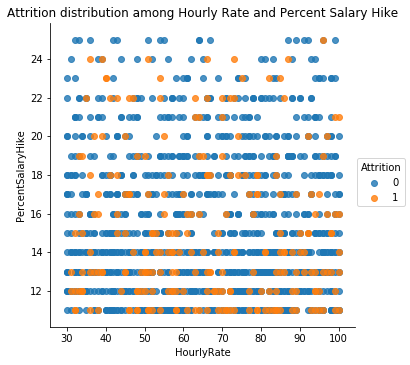

In [16]:
sns.lmplot(x='Age', y='DailyRate', data = df,
          fit_reg=False, hue='Attrition')
plt.title('Attrition distribution Comparing between Daily Rate and Age')

sns.lmplot(x='MonthlyIncome', y='YearsWithCurrManager', data = df,
          fit_reg=False, hue='Attrition')
plt.title('Attrition distribution Comparing between Montly Income and Years With Current Manager')

sns.lmplot(x='HourlyRate', y='PercentSalaryHike', data = df,
          fit_reg=False, hue='Attrition')
plt.title('Attrition distribution among Hourly Rate and Percent Salary Hike')

# EDA 3. Attrition Distribution

C:\Users\hugep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Years Since Last Promotion Distrbution')

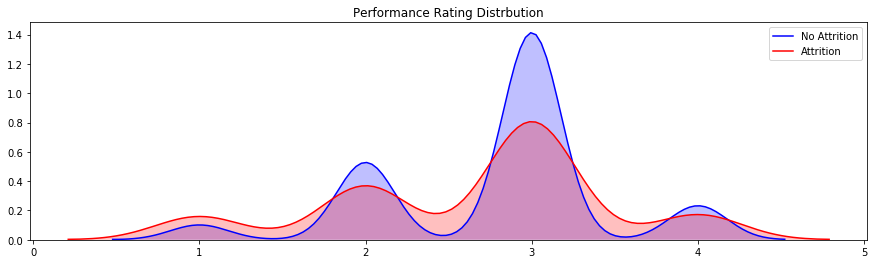

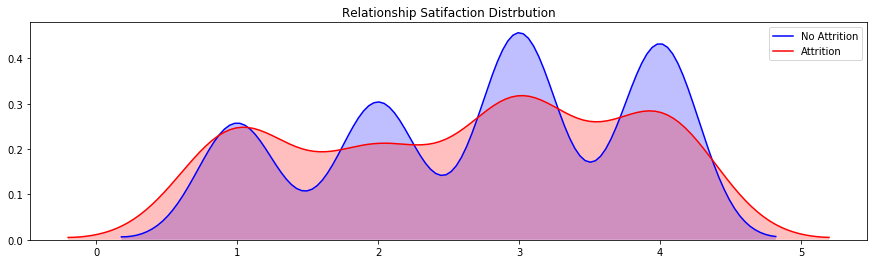

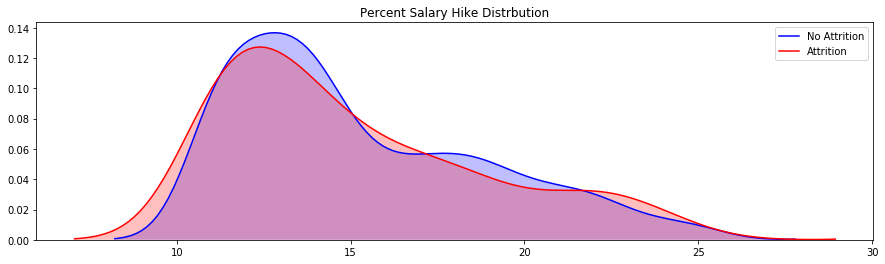

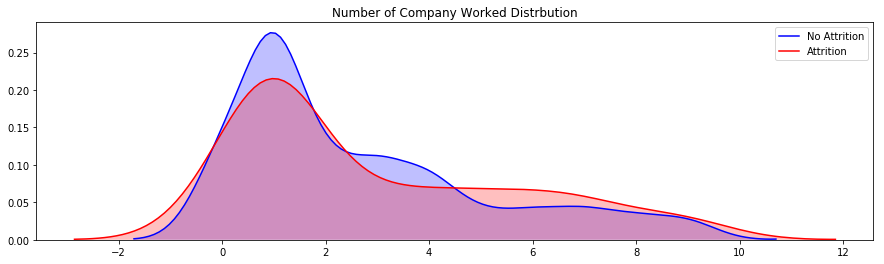

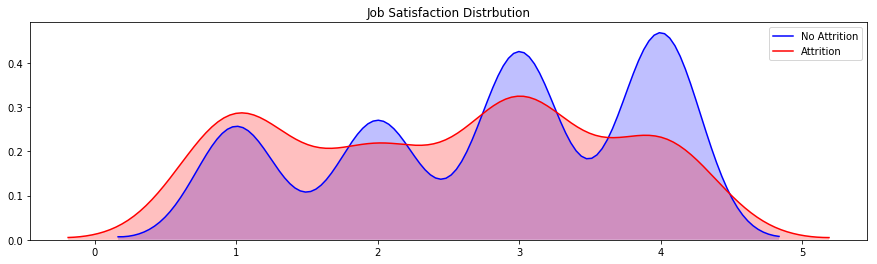

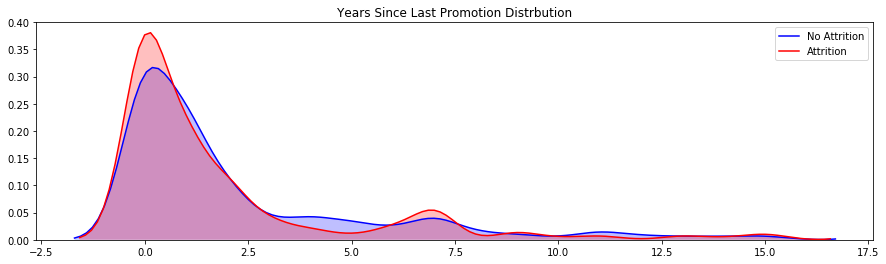

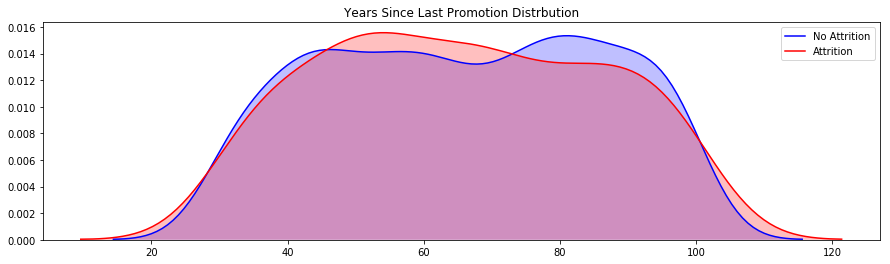

In [17]:
# KEDPlot: Kernal Density Estimate Plot
# Work life balance
fig = plt.figure(figsize = (15,4))
ax = sns.kdeplot(df.loc[(df['Attrition'] == 0),'WorkLifeBalance'], color='b', shade=True, label='No Attrition')
ax = sns.kdeplot(df.loc[(df['Attrition'] == 1),'WorkLifeBalance'], color='r', shade=True, label='Attrition')
plt.title('Performance Rating Distrbution')

# Relationship Satifaction
fig = plt.figure(figsize = (15,4))
ax = sns.kdeplot(df.loc[(df['Attrition'] == 0),'RelationshipSatisfaction'], color='b', shade=True, label='No Attrition')
ax = sns.kdeplot(df.loc[(df['Attrition'] == 1),'RelationshipSatisfaction'], color='r', shade=True, label='Attrition')
plt.title('Relationship Satifaction Distrbution')

# Percent Salary Hike
fig = plt.figure(figsize = (15,4))
ax = sns.kdeplot(df.loc[(df['Attrition'] == 0),'PercentSalaryHike'], color='b', shade=True, label='No Attrition')
ax = sns.kdeplot(df.loc[(df['Attrition'] == 1),'PercentSalaryHike'], color='r', shade=True, label='Attrition')
plt.title('Percent Salary Hike Distrbution')

# Number of Company Worked
fig = plt.figure(figsize = (15,4))
ax = sns.kdeplot(df.loc[(df['Attrition'] == 0),'NumCompaniesWorked'], color='b', shade=True, label='No Attrition')
ax = sns.kdeplot(df.loc[(df['Attrition'] == 1),'NumCompaniesWorked'], color='r', shade=True, label='Attrition')
plt.title('Number of Company Worked Distrbution')

# Job Satisfaction
fig = plt.figure(figsize = (15,4))
ax = sns.kdeplot(df.loc[(df['Attrition'] == 0),'JobSatisfaction'], color='b', shade=True, label='No Attrition')
ax = sns.kdeplot(df.loc[(df['Attrition'] == 1),'JobSatisfaction'], color='r', shade=True, label='Attrition')
plt.title('Job Satisfaction Distrbution')

# Years Since Last Promotion
fig = plt.figure(figsize = (15,4))
ax = sns.kdeplot(df.loc[(df['Attrition'] == 0),'YearsSinceLastPromotion'], color='b', shade=True, label='No Attrition')
ax = sns.kdeplot(df.loc[(df['Attrition'] == 1),'YearsSinceLastPromotion'], color='r', shade=True, label='Attrition')
plt.title('Years Since Last Promotion Distrbution')

# Distance From Home
fig = plt.figure(figsize = (15,4))
ax = sns.kdeplot(df.loc[(df['Attrition'] == 0),'HourlyRate'], color='b', shade=True, label='No Attrition')
ax = sns.kdeplot(df.loc[(df['Attrition'] == 1),'HourlyRate'], color='r', shade=True, label='Attrition')
plt.title('Years Since Last Promotion Distrbution')

# Pre-processing

Apply get_dummies() to the categorical variables

In [18]:
num_var=['Attrition','Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
cat_var=['Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime',]
categorical_df=pd.get_dummies(df[cat_var],drop_first=True)
numerical_df=df[num_var]

new_df=pd.concat([numerical_df,categorical_df], axis=1)
new_df.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,41,1102,1,2,2,94,4,5993,19479,...,0,0,0,0,0,1,0,0,1,1
1,0,49,279,8,1,3,61,2,5130,24907,...,0,0,0,0,1,0,0,1,0,0
2,1,37,1373,2,2,4,92,3,2090,2396,...,1,0,0,0,0,0,0,0,1,1
3,0,33,1392,3,4,4,56,3,2909,23159,...,0,0,0,0,1,0,0,1,0,1
4,0,27,591,2,1,1,40,2,3468,16632,...,1,0,0,0,0,0,0,1,0,0


# Class Imbalance
## Employee Turnover Rate: 16%

In [19]:
attrition_rate

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

Text(0,0.5,'Number of Employee')

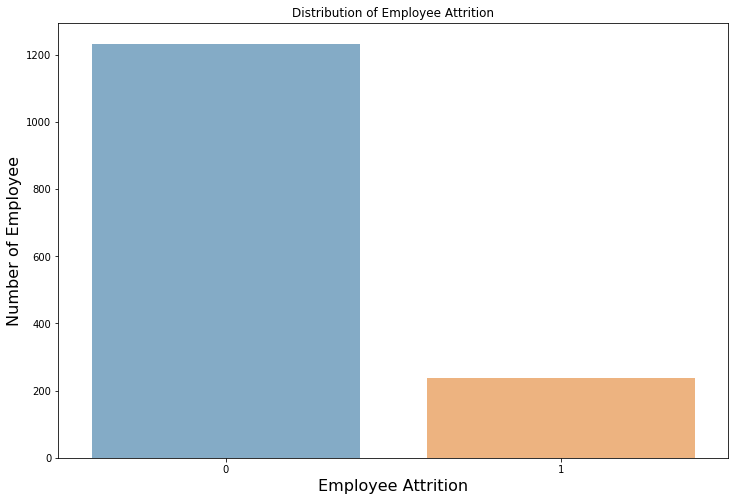

In [20]:
plt.figure(figsize = (12,8))
Attrition = df.Attrition.value_counts()
sns.barplot(y=Attrition.values, x=Attrition.index, alpha = 0.6)
plt.title('Distribution of Employee Attrition')
plt.xlabel('Employee Attrition', fontsize = 16)
plt.ylabel('Number of Employee', fontsize = 16)

# Treat Imbalanced Datasets
## Oversampling -- SMOTE & Undersampling -- RandomUnderSampler

# Split Train/Test Set

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve


In [22]:
# Create the x and y set
x = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

# Define train and test dataset
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.15, random_state=123, stratify=y)


In [23]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Upsample minority class
x_train_u, y_train_u=resample(x_train[y_train == 1],
                              y_train[y_train == 1],
                              replace = True,
                              n_samples=x_train[y_train == 0].shape[0],
                              random_state = 1)

# Upsample using SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

# Downsample majority class
x_train_d, y_train_d = resample(x_train[y_train == 0],
                                y_train[y_train == 0],
                                replace = True,
                                n_samples=x_train[y_train == 1].shape[0],
                                random_state=1)
x_train_d = np.concatenate((x_train[y_train == 1], x_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))

print('Upsampled shape:', x_train.shape, y_train.shape)
print('SMOTE shape:', x_train_sm.shape, y_train_sm.shape)
print('Downsample shape:',x_train_d.shape, y_train_d.shape)




Upsampled shape: (1249, 39) (1249,)
SMOTE shape: (2096, 39) (2096,)
Downsample shape: (402, 39) (402,)


# Choose Which Sampling Technique to Use For Model

## Original Saample: F1 Score is 0.408
## SMOTE: F1 Score is 0.865
## Downsample: F1 Score is 0.716

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Create the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (x_train, y_train),
                "SMOTE":(x_train_sm, y_train_sm),
                "Downsampled": (x_train_d, y_train_d)}

# Loop through each type of training sets and apply 10-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used
for method in methods_data.keys():
    lr_results = cross_val_score(LogisticRegression(), methods_data[method][0], methods_data[method][1], cv=10, scoring='f1')
    print(f"The best F1 Score for {method} data:")
    print (lr_results.mean())
    
cross_val_score(LogisticRegression(class_weight='balanced'), x_train, y_train, cv=5, scoring='f1').mean()


C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

The best F1 Score for Original data:
0.4078908426327127


C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

The best F1 Score for SMOTE data:
0.8647254983228848
The best F1 Score for Downsampled data:
0.7158778889684643


C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.4651436392239584

# Train Tree Models
## Logistic Regression, Random Forest, Support Vector Machine

# Train and Test Logistic Regression Model

In [30]:
%%time

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# Check accuracy of Logistic Model# Check
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression Model
lr=LogisticRegression(class_weight='balanced')

# Fit the logistic regression model to the train set
lr.fit(x_train_sm, y_train_sm)

print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(x_test))

print ("Logistic Regression AUC = %2.2f" % lr_auc)
predict = lr.predict(x_test)
print('Logistic accuracy is %2.2f' % accuracy_score(y_test, predict))
print(classification_report(y_test, predict))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.71
Logistic accuracy is 0.86
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       185
           1       0.58      0.50      0.54        36

   micro avg       0.86      0.86      0.86       221
   macro avg       0.74      0.71      0.73       221
weighted avg       0.85      0.86      0.86       221

Wall time: 31.2 ms


C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Apply 10-Fold Cross Validation for Random Forest

In [50]:
%%time
from sklearn.ensemble import RandomForestClassifier

# Define Random Forest Model
rf=RandomForestClassifier(class_weight='balanced')

rf_results=cross_val_score(rf, x_train_sm, y_train_sm, cv=10, scoring='f1')

# Average score
rf_auc=rf_results.mean()
print('The Random Forest AUC:%.3f and the STD IS (%.3F)'%(rf_auc, rf_results.std()))

C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: F

The Random Forest AUC:0.864 and the STD IS (0.158)
Wall time: 295 ms


C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Train Random Forest Classifier Model

In [51]:
%%time

from sklearn.ensemble import RandomForestClassifier


# Fit the RF Model
rf=rf.fit(x_train_sm, y_train_sm)

print('\n\n ---Random Forest Model---')
rf_roc_auc=roc_auc_score(y_test, rf.predict(x_test))
print('Random Forest AUC = %2.2f' % rf_roc_auc)
print(classification_report(y_test, rf.predict(x_test)))



 ---Random Forest Model---
Random Forest AUC = 0.63
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       185
           1       0.55      0.31      0.39        36

   micro avg       0.85      0.85      0.85       221
   macro avg       0.71      0.63      0.65       221
weighted avg       0.82      0.85      0.83       221

Wall time: 31.3 ms


C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Gradient Boosting Classifier

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc=gbc.fit(x_train_sm, y_train_sm)
gbc

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

## Apply 10-Fold Cross Validation for Gradient Boosting Classifier

In [43]:
gbc_result = cross_val_score(gbc, x_train_sm, y_train_sm, cv=5, scoring='f1')
gbc_result.mean()

0.8234346714722974

## Gradient Boosting Classifier 

In [47]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Gradient Boosting Model---")
gbc_auc = roc_auc_score(y_test, gbc.predict(x_test))
print ("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)
print(classification_report(y_test, gbc.predict(x_test)))



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.67
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       185
           1       0.64      0.39      0.48        36

   micro avg       0.86      0.86      0.86       221
   macro avg       0.76      0.67      0.70       221
weighted avg       0.85      0.86      0.85       221



# Support Vector Classifier|

In [38]:
%%time

# Define SVM
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', probability=True)
svc=svclassifier.fit(x_train_sm, y_train_sm)

C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wall time: 718 ms


In [54]:
# Apply 10-Fold Cross Validation
svc_result = cross_val_score(svc, x_train_sm, y_train_sm, cv=10, scoring='f1')

print('\n\n ---Support Vector Machine---')
svm_roc_auc=roc_auc_score(y_test, rf.predict(x_test))
print('SVM AUC = %2.2f' % rf_roc_auc)
print(classification_report(y_test, rf.predict(x_test)))

C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hugep\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni



 ---Support Vector Machine---
SVM AUC = 0.63
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       185
           1       0.55      0.31      0.39        36

   micro avg       0.85      0.85      0.85       221
   macro avg       0.71      0.63      0.65       221
weighted avg       0.82      0.85      0.83       221



## ROC Graph

In [48]:
rf.predict_proba(x_test)

array([[1. , 0. ],
       [0.7, 0.3],
       [0.9, 0.1],
       [1. , 0. ],
       [0.7, 0.3],
       [0.7, 0.3],
       [0.4, 0.6],
       [1. , 0. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.5, 0.5],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0.9, 0.1],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.7, 0.3],
       [0.5, 0.5],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.5, 0.5],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.7, 0.3],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.9, 0.1],
       [0.5, 0.5],
       [0.7, 0.3],
       [0.7, 0.3],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.7, 0.3],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.9, 0.1],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.9, 0.1],
       [0.6,

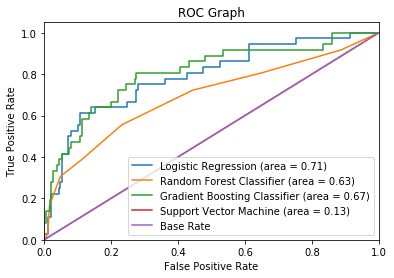

In [57]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test,gbc.predict_proba(x_test)[:,1])
svm_fpr,svm_tpr,svm_thresholds = roc_curve(y_test,svc.predict_proba(x_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

# Plot Support Vector Machine ROC
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine (area = %0.2f)' % svc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [77]:
# Confusion Matrix for Linear Regresion
print('Confusion Matrix for Linear Regresion')
print(confusion_matrix(y_test, lr.predict(x_test)),'\n')

# Confusion Matrix for Linear Regresion
print('Confusion Matrix Gradient Boosting Classifier')
print(confusion_matrix(y_test, gbc.predict(x_test)),'\n')

# Confusion Matrix for Linear Regresion
print('Confusion Matrix for Random Forest Classifier')
print(confusion_matrix(y_test, rf.predict(x_test)),'\n')

# Confusion Matrix for Support Vector Machine
print('Confusion Matrix for Support Vector Machine')
print(confusion_matrix(y_test, svc.predict(x_test)),'\n')

Confusion Matrix for Linear Regresion
[[172  13]
 [ 18  18]] 

Confusion Matrix Gradient Boosting Classifier
[[177   8]
 [ 22  14]] 

Confusion Matrix for Random Forest Classifier
[[176   9]
 [ 25  11]] 

Confusion Matrix for Support Vector Machine
[[185   0]
 [ 36   0]] 



In [61]:
confusion_matrix(y_test, gbc.predict(x_test))

array([[177,   8],
       [ 22,  14]], dtype=int64)

In [63]:
confusion_matrix(y_test, rf.predict(x_test))

array([[176,   9],
       [ 25,  11]], dtype=int64)

# Random Forest Feature Importances

In [80]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,StockOptionLevel,0.062386
1,Department_Research & Development,0.059706
2,MonthlyIncome,0.055572
3,MaritalStatus_Married,0.054242
4,YearsAtCompany,0.051507
5,Department_Sales,0.046726
6,JobSatisfaction,0.045409
7,EnvironmentSatisfaction,0.044246
8,TotalWorkingYears,0.043067
9,MonthlyRate,0.041420


In [84]:
feature_importances = pd.DataFrame(gbc.feature_importances_,
                                   index=x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,StockOptionLevel,0.173243
1,EducationField_Medical,0.078162
2,Department_Sales,0.070617
3,JobSatisfaction,0.059827
4,MaritalStatus_Married,0.059146
5,Department_Research & Development,0.056526
6,MonthlyIncome,0.052808
7,EnvironmentSatisfaction,0.044874
8,EducationField_Life Sciences,0.035735
9,TotalWorkingYears,0.035333


# Apply Random Noise to Feature Importance


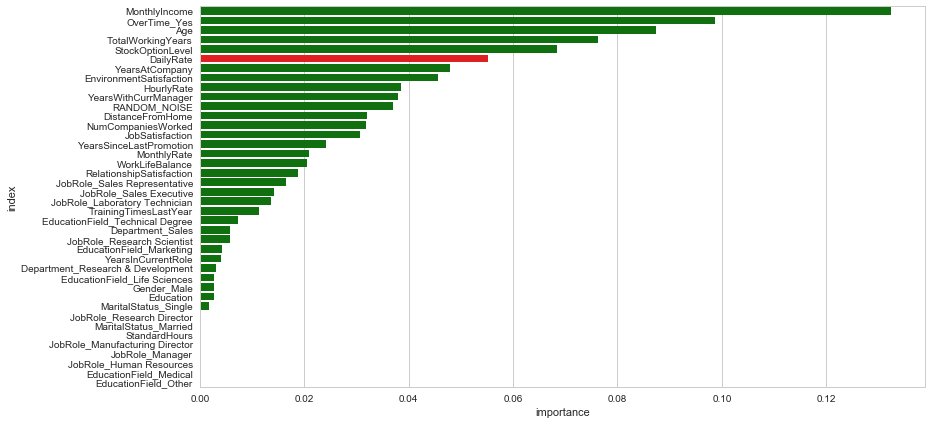

In [89]:

# Apply Random Noise to data set
x_train_rnoise = pd.DataFrame(x_train)
x_train_rnoise['RANDOM_NOISE'] = np.random.normal(0, 1, x_train_rnoise.shape[0])

# Fit Random Forest to DataSet
gbc_random = GradientBoostingClassifier()
gbc_random = gbc_random.fit(x_train_rnoise, y_train)

# Get Feature Importances
feature_importances_random = pd.DataFrame(gbc_random.feature_importances_, index = X_train_rnoise.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances_random = feature_importances_random.reset_index()

# Create Seaborn PLot
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))


clrs = ['red' if (x == 5 ) else 'green' for x in feature_importances_random.index.values ]

# Plot the Feature Importance
sns.barplot(x="importance", y='index', data=feature_importances_random,
            label="Total",  palette=clrs)